<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/Machine_learning_FJ_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Install and enable the `ipywidgets` library, which allows you to create interactive widgets in your notebooks.

1. **`!pip install ipywidgets`**:
   - This command uses the `pip` package manager to install the `ipywidgets` library.
   - The `!` at the beginning indicates that this command should run in the shell (command line) instead of Python.
   - By installing `ipywidgets`, you can utilize various interactive controls like sliders, buttons, and dropdowns within your Jupyter Notebook.

2. **`!jupyter nbextension enable --py widgetsnbextension`**:
   - This command enables the Jupyter notebook extension that supports `ipywidgets`.
   - `nbextension` is a way to add additional features and functionalities to Jupyter Notebooks.
   - The `--py` flag specifies that you are enabling a Python extension.
   - After running this command, the interactive widgets will be fully functional in the Jupyter Notebook interface.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm

1. **`import numpy as np`**: This imports the NumPy library, which is a powerful library for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions.

2. **`import matplotlib.pyplot as plt`**: This imports the `pyplot` module from the Matplotlib library, which is widely used for creating static, animated, and interactive visualizations in Python.

3. **`import ipywidgets as widgets`**: This imports the `ipywidgets` library, which allows for the creation of interactive HTML widgets in Jupyter notebooks. It can be used to build interactive interfaces for data visualization.

4. **`from IPython.display import display`**: This imports the `display` function from IPython's display module, which is used to display objects like dataframes, images, and widgets within Jupyter notebooks.

5. **`from sklearn.model_selection import train_test_split`**: This imports the `train_test_split` function from Scikit-learn. This function is used to split datasets into training and testing sets, which is a crucial step in model validation and evaluation.

6. **`from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay`**: This imports several metrics from Scikit-learn useful for assessing the performance of machine learning models:
   - `accuracy_score` calculates the accuracy of the model predictions.
   - `confusion_matrix` generates a confusion matrix to evaluate the performance of a classification model.
   - `ConfusionMatrixDisplay` is a convenient way to visualize the confusion matrix.

7. **`import matplotlib.cm as cm`**: This imports the colormap module from Matplotlib, which provides a range of color maps helpful for visualizing data in various formats (e.g., heatmaps, scatter plots).



In [3]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self._euclidean_distance
        else:
            self.distance_func = distance_func

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]

            # indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # labels of the k nearest neighbors
            k_neighbor_labels = self.y_train[k_indices]
            # majority vote
            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)

#Defines a simple K-Nearest Neighbors (KNN) classifier in Python. Here's a breakdown of what each part does:

### Class Definition
- **`class KNNClassifier`**: This defines a class named `KNNClassifier`, which implements the KNN algorithm.

### Initialization Method (`__init__`)
- **`def __init__(self, k=3, distance_func=None):`**: This is the constructor method that initializes an instance of the `KNNClassifier`.
  - **Parameters**:
    - `k`: The number of nearest neighbors to consider for making predictions. It defaults to `3`.
    - `distance_func`: A custom distance function to use for calculating distances between points. If not provided, it will use the default Euclidean distance.
  
- **`self.k = k`**: This assigns the number of neighbors (`k`) for the classifier instance.

- **`if distance_func is None:`**: This checks if a custom distance function was supplied.
  - **`self.distance_func = self._euclidean_distance`**: If no custom function is provided, it sets the distance function to the internal method `_euclidean_distance`, which calculates Euclidean distance.

### Fitting the Model (`fit` method)
- **`def fit(self, X, y):`**: This method is used to fit the KNN model to the training data.
  - **Parameters**:
    - `X`: The feature set (input data) used for training.
    - `y`: The labels (output data) corresponding to the training features.

- **`self.X_train = X`**: This stores the training feature set in the classifier object for future predictions.


### Summary
In summary, this KNN classifier class allows users to create a KNN model by specifying the number of neighbors `k` and optionally selecting a custom distance function. The `fit` method stores the training data for later use when making predictions, which would be based on the nearest neighbors' labels in the full implementation.

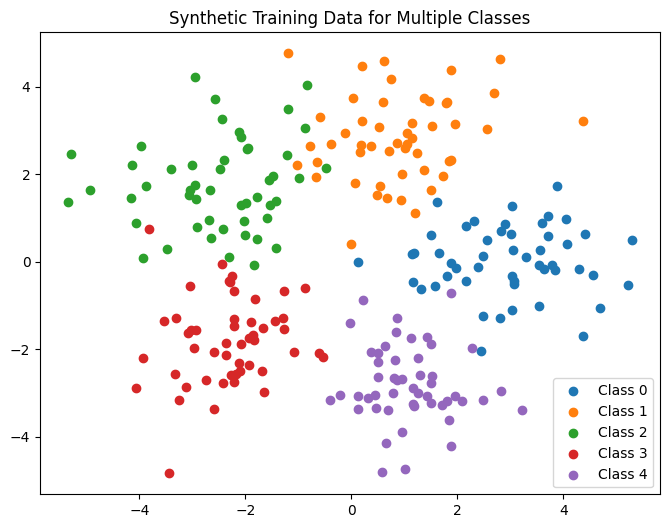

In [4]:
def generate_synthetic_data(m=3, num_points_per_class=100, cluster_std=1.0):
    np.random.seed(40)
    X = []
    y = []
    means = []
    for i in range(m):
        angle = 2 * np.pi * i / m
        radius = 3
        mean = [radius * np.cos(angle), radius * np.sin(angle)]
        means.append(mean)
        cov = [[cluster_std, 0], [0, cluster_std]]
        class_data = np.random.multivariate_normal(mean, cov, num_points_per_class)
        X.append(class_data)
        y += [i] * num_points_per_class

    X = np.vstack(X)
    y = np.array(y)
    return X, y, means

m = 5  # number of classes
num_points_per_class = 50
cluster_std = 1.0

X, y, class_means = generate_synthetic_data(m=m, num_points_per_class=num_points_per_class, cluster_std=cluster_std)

plt.figure(figsize=(8,6))
colors = plt.colormaps['tab10'].colors
for i in range(m):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f'Class {i}')
plt.title('Synthetic Training Data for Multiple Classes')
plt.legend()
plt.show()


1. **Function Definition**:
   - `def generate_synthetic_data(m=3, num_points_per_class=100, cluster_std=1.0):`
     - This defines a function that accepts three parameters:
       - `m`: The number of clusters (default is 3).
       - `num_points_per_class`: The number of data points to generate for each cluster (default is 100).
       - `cluster_std`: The standard deviation for the clusters, which determines the spread of the points around their center (default is 1.0).

2. **Setting the Random Seed**:
   - `np.random.seed(40)`
     - This sets the seed for NumPy's random number generator to ensure that the random numbers generated are reproducible every time the function is run.

3. **Initializing Lists**:
   - `X = []` and `y = []`
     - These lists will be used to store the generated data points (`X`) and their corresponding labels (`y`).

4. **Mean Calculation for Clusters**:
   - `means = []`: Initializes an empty list to store the mean positions of each cluster.
   - `for i in range(m):`: This loop runs `m` times (the number of clusters).
     - Inside the loop,
       - `angle = 2 * np.pi * i / m` calculates the angle for positioning the cluster center in a circular layout.
       - `radius = 3` sets the distance of the cluster centers from the origin.
       - `mean = [radius * np.cos(angle), radius * np.sin(angle)]`: Computes the (x, y) coordinates of the cluster center using the angle and radius from a circle.

5. **Storing Cluster Means**:
   - `means.append(mean)`: Appends the calculated center of each cluster to the `means` list.

6. **Plotting (implied)**:
   - The last two lines with `plt.legend()` and `plt.show()` suggest that after generating the data points, there will be plotting involved, but these lines are outside of the function definition and not fully shown here.

In summary, this function initializes cluster centers in a circular pattern and is set up to generate synthetic data points for each cluster, useful for testing clustering algorithms or visualizing data distributions. However, the actual generation of data points and plotting functionality is not fully included in the provided snippet.

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

test_size = 0.2  # 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Total samples: 250
Training samples: 200
Testing samples: 50



1. **Importing Libraries**:
   - `train_test_split`: A function to split datasets into training and testing subsets.
   - `accuracy_score`, `confusion_matrix`, `ConfusionMatrixDisplay`: Metrics and tools for evaluating the performance of a classification model.

2. **Setting the Test Size**:
   - `test_size = 0.2`: This sets aside 20% of the dataset for testing purposes. The remaining 80% will be used for training the model.

3. **Splitting the Data**:
   - `train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)`:
     - `X`: Features of the dataset (input variables).
     - `y`: Target variable (output/class labels).
     - `test_size`: Specifies the percentage of data to allocate to the test set.
     - `stratify=y`: Ensures that the split maintains the same proportion of classes in both training and testing datasets, which is important for imbalanced datasets.
     - `random_state=42`: A fixed seed for the random number generator to ensure that the results are reproducible; the same split will be generated every time you run the code.

4. **Printing Sample Counts**:
   - `print(f"Total samples: {X.shape[0]}")`: Displays the total number of samples (rows) in the dataset.
   - `print(f"Training samples: {X_train.shape[0]}")`: Shows the number of samples used for training the model.
   - `print(f"Testing samples: {X_test.shape[0]}")`: Indicates how many samples are set aside for testing the model.



In [7]:
def plot_decision_boundaries(classifier, X, y, means, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    colors = plt.get_cmap('tab10', np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k', s=40)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=f'Class {i}',
                   markerfacecolor=colors(i), markersize=10) for i in range(np.unique(y).size)
    ], loc='upper right')
    plt.show()


### Function Overview:
```python
def plot_decision_boundaries(classifier, X, y, means, title='Decision Boundaries'):
```
- **Parameters**:
  - `classifier`: A trained machine learning model that has a `predict` method.
  - `X`: A 2D array of input features (data points).
  - `y`: An array of corresponding labels (classes) for the data points.
  - `means`: A placeholder for additional data (not used in the visible code, but likely for annotation or processing).
  - `title`: A string specifying the title of the plot.

### Step-by-step Breakdown:
1. **Determine Plot Limits**:
    ```python
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ```
   - This part calculates the minimum and maximum values for the x and y axes based on the features in `X`.
   - It adds a small margin (`-1` and `+1`) to ensure the boundaries are not too close to the plotted points.

2. **Create a Grid of Points**:
    ```python
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    ```
   - A grid of points is generated over the defined range using a step size (`h`). `xx` and `yy` will hold the coordinates of each grid point.

3. **Prepare for Predictions**:
    ```python
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid_points)
    ```
   - The grid's x and y coordinates are combined into a single array (`grid_points`) and then used to predict class labels (`Z`) using the classifier.

4. **Plotting**:
    - The plotting-related code (which is not fully visible) would typically include:
        - Contour plotting to visualize areas where each class is predicted.
        - Plotting the original data points from `X` colored according to their labels in `y`.
    - The part visible in the code handles labeling the axes and creating a legend that distinguishes between the different classes.

5. **Displaying the Plot**:
    ```python
    plt.show()
    ```
   - Finally, this line displays the created plot.

### Overall Explanation:
This function visualizes the decision boundaries of a classifier in a 2D feature space. It takes a trained classifier and a dataset, calculates the necessary axes for plotting, generates a grid of potential feature combinations, predicts class labels at these points, and then plots the decision boundaries along with the original data points and a legend. This is useful for understanding how the classifier distinguishes between different classes based on the features provided.

In [8]:
distance_func = euclidean_distance

k = 5
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X_train, y_train)

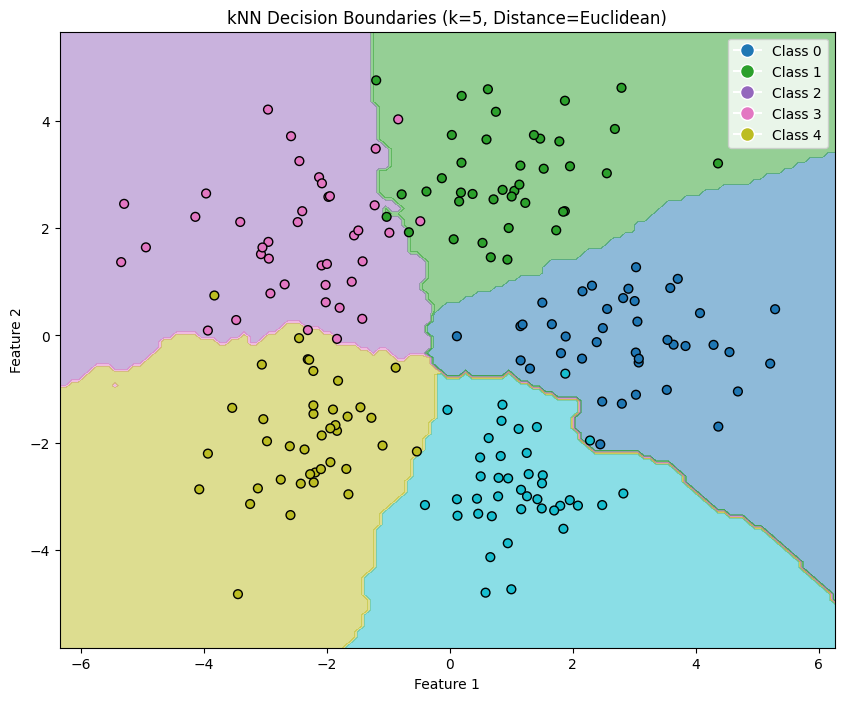

In [9]:
plot_decision_boundaries(
    classifier=knn,
    X=X_train,
    y=y_train,
    means=class_means,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

## Refrence

[GitHub](https://github.com/SharifiZarchi/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_01_Supervised_Learning/04-kNN/04-kNN.ipynb)